In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn import model_selection
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y, y_prediction):
    return sum((y - y_prediction)**2) / len(y)

In [6]:
def bias(y, z):
    return(y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [22]:
eta = 0.01
n_trees = [1, 3, 5, 7, 15, 25]
max_depth = [1, 2, 3, 4, 5]


In [23]:
final = []
for tree in n_trees:
    coefs = [1] * tree
    for depth in max_depth:
        trees, train_errors, test_errors = gb_fit(tree, depth, X_train, X_test, y_train, y_test, coefs, eta)
        final.append((tree, depth, train_errors[-1], test_errors[-1]))

In [12]:
# Ошибки для первого дерева слишком большие уберм их в отдельный array
final_1 = final[0 : 5]
final_1

[(1, 1, 30946.268882175227, 23492.846846846845),
 (1, 2, 30946.268882175227, 23492.846846846845),
 (1, 3, 30946.268882175227, 23492.846846846845),
 (1, 4, 30946.268882175227, 23492.846846846845),
 (1, 5, 30946.268882175227, 23492.846846846845)]

In [13]:
final_new = final[5 : ]
final_new

[(3, 1, 21758.17581146787, 15895.262720889228),
 (3, 2, 21465.136537854796, 15757.53704551965),
 (3, 3, 21316.429439628984, 15672.796893569368),
 (3, 4, 21134.94983870624, 15611.252631433714),
 (3, 5, 20926.206932329715, 15665.414813764815),
 (5, 1, 15673.79977932564, 10997.036017538734),
 (5, 2, 15228.907028618572, 10916.030153041127),
 (5, 3, 14959.671706781503, 10756.175470557298),
 (5, 4, 14664.7096452067, 10730.857030893612),
 (5, 5, 14337.367586705415, 10821.241311297747),
 (7, 1, 11626.150033530148, 7905.518263556366),
 (7, 2, 11091.996275410385, 7807.314139462974),
 (7, 3, 10744.942685326598, 7520.541189429019),
 (7, 4, 10336.387122256678, 7463.094192388973),
 (7, 5, 9951.573446589531, 7685.003316962624),
 (15, 1, 5034.813570638855, 3442.3587943699126),
 (15, 2, 4382.866350118557, 3169.0377363033763),
 (15, 3, 3906.5097552964808, 3108.477001434764),
 (15, 4, 3302.1796790786443, 3144.8052479619446),
 (15, 5, 2778.5250228755935, 3260.414050756379),
 (25, 1, 3370.7629511203086, 28

In [14]:
z_train = final_new[ : 5]
z_train

[(3, 1, 21758.17581146787, 15895.262720889228),
 (3, 2, 21465.136537854796, 15757.53704551965),
 (3, 3, 21316.429439628984, 15672.796893569368),
 (3, 4, 21134.94983870624, 15611.252631433714),
 (3, 5, 20926.206932329715, 15665.414813764815)]

In [15]:
df = pd.DataFrame(data=final[5 :], columns=['Trees', 'Depth', 'Train_error', 'Test_error'])
df

,Trees,Depth,Train_error,Test_error
0,3,1,21758.175811,15895.262721
1,3,2,21465.136538,15757.537046
2,3,3,21316.429440,15672.796894
3,3,4,21134.949839,15611.252631
4,3,5,20926.206932,15665.414814
5,5,1,15673.799779,10997.036018
6,5,2,15228.907029,10916.030153
7,5,3,14959.671707,10756.175471
8,5,4,14664.709645,10730.857031
9,5,5,14337.367587,10821.241311


In [19]:
x, y = np.reshape(df['Trees'].values, (-1, 5)), np.reshape(df['Depth'].values, (-1, 5))
z_train = np.reshape(df['Train_error'].values, (-1, 5))
z_test = np.reshape(df['Test_error'].values, (-1, 5))

In [20]:
print(z_train)
print(z_test)

[[21758.17581147 21465.13653785 21316.42943963 21134.94983871
  20926.20693233]
 [15673.79977933 15228.90702862 14959.67170678 14664.70964521
  14337.36758671]
 [11626.15003353 11091.99627541 10744.94268533 10336.38712226
   9951.57344659]
 [ 5034.81357064  4382.86635012  3906.5097553   3302.17967908
   2778.52502288]
 [ 3370.76295112  2765.84243693  2173.06554207  1509.0415581
    928.28016235]]
[[15895.26272089 15757.53704552 15672.79689357 15611.25263143
  15665.41481376]
 [10997.03601754 10916.03015304 10756.17547056 10730.85703089
  10821.2413113 ]
 [ 7905.51826356  7807.31413946  7520.54118943  7463.09419239
   7685.00331696]
 [ 3442.35879437  3169.0377363   3108.47700143  3144.80524796
   3260.41405076]
 [ 2836.91884544  2763.11742078  2824.33814418  2841.54417998
   3051.19722757]]


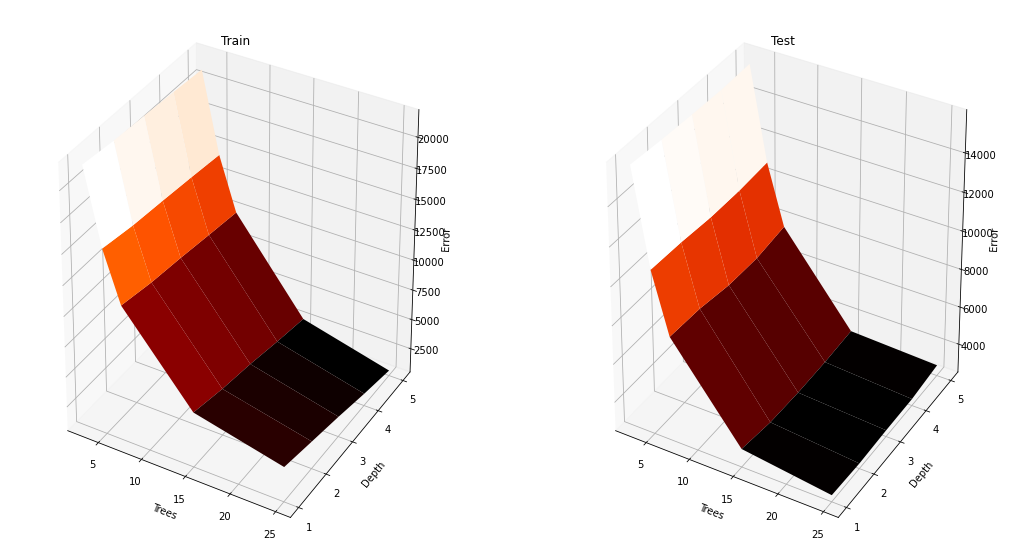

In [21]:
fig = plt.figure(figsize=(18, 10))

ax = fig.add_subplot(121, projection='3d', title='Train')
ax.plot_surface(x, y, z_train, cmap='gist_heat')
ax.set_yticks(np.unique(y))
ax.set_xlabel('Trees')
ax.set_ylabel('Depth')
ax.set_zlabel('Error')

ax = fig.add_subplot(122, projection='3d', title='Test')
ax.plot_surface(x, y, z_test, cmap='gist_heat')
ax.set_yticks(np.unique(y))
ax.set_xlabel('Trees')
ax.set_ylabel('Depth')
ax.set_zlabel('Error')

plt.show()

C ростом числа деревьев видим уменьшение ошибки. При большом числе деревьев идет небольшое увеличение ошибки на тесте - начинается небольшое переобучение .

 С ростом глубины деревьев заметно сильное переобучение модели (ошибка на трейне уменьшается, но при этом ошибка на тесте растет сильно),  данный параметр требуется отрегулировать.
